In [ ]:
pip install googletrans

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud


In [ ]:
data=pd.read_csv("/helpdesk_customer_tickets.csv")

In [ ]:
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,36,Anfrage zu den Spezifikationen und Anpassungso...,Sehr geehrtes Support-Team des Tech Online Sto...,"Sehr geehrter <name>,\n\nvielen Dank für Ihr I...",Request,Customer Service,medium,de,Tech Online Store,Product Support,Sales Inquiry,Technical Guidance,General Inquiry,NaN,NaN,NaN,NaN,NaN
1,39,Déconnexions fréquentes et plantages,Le client signale des déconnexions fréquentes ...,Nous allons enquêter sur le problème avec Zoom...,Incident,Product Support,high,fr,Software Development Company,Technical Support,Software Bug,Service Disruption,System Crash,Problem Resolution,Performance Tuning,NaN,NaN,NaN
2,243,Problema de sonido Dell XPS,"Problema con el sonido, manejando como devoluc...",Gracias por su correo electrónico. Procesaremo...,Problem,Returns and Exchanges,medium,es,Tech Online Store,Returns and Exchanges,Product Support,Customer Service,Refund Request,NaN,NaN,NaN,NaN,NaN
3,381,Assistance requise pour la configuration du ta...,"Cher support client,\n\nNotre client, <name>, ...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Product Support,medium,fr,Software Development Company,Technical Support,Product Support,General Inquiry,Problem Resolution,Training Request,NaN,NaN,NaN,NaN
4,663,Urgente: Assistência Imediata Necessária para ...,Caro Suporte ao Cliente da Firma de Consultori...,"Caro Cliente,\n\nRecebemos sua solicitação urg...",Incident,Human Resources,medium,pt,IT Consulting Firm,Urgent Issue,Payroll Issue,Technical Support,Service Disruption,Problem Resolution,Account Assistance,NaN,NaN,NaN


In [ ]:
#  Response Prediction Analysis
# Prepare data for prediction
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(data['body'].fillna('')).toarray()
y = data['type']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      Change       1.00      0.06      0.12        16
    Incident       0.51      0.86      0.64        50
     Problem       0.54      0.23      0.33        30
     Request       0.68      0.62      0.65        24

    accuracy                           0.55       120
   macro avg       0.68      0.45      0.43       120
weighted avg       0.62      0.55      0.49       120

Confusion Matrix:
 [[ 1 10  1  4]
 [ 0 43  4  3]
 [ 0 23  7  0]
 [ 0  8  1 15]]
Accuracy Score: 0.55


<ipython-input-44-56e557a4dabb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f[0] for f in important_features], y=[f[1] for f in important_features], palette="viridis")


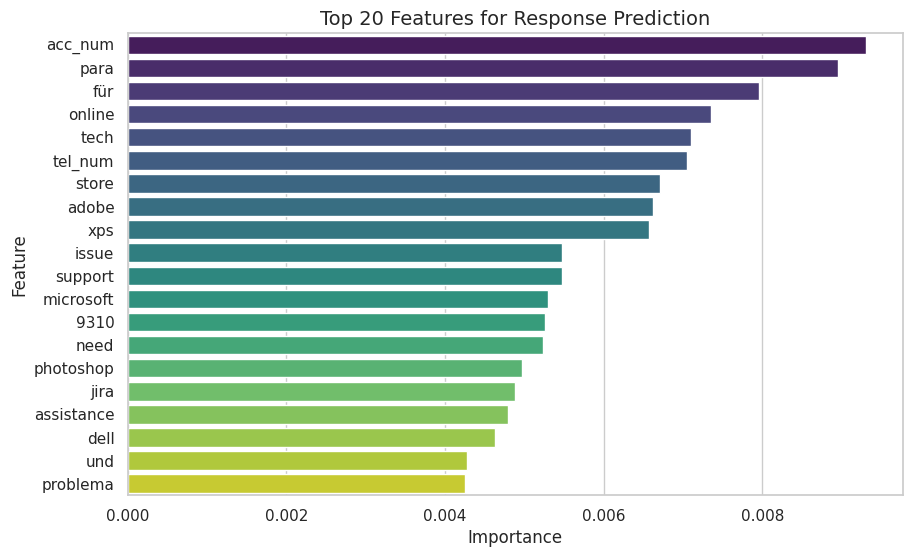

In [ ]:
# Response Automation Analysis
# Feature importance from Random Forest
feature_importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Display top 20 important features
important_features = sorted(zip(feature_importances, feature_names), reverse=True)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=[f[0] for f in important_features], y=[f[1] for f in important_features], palette="viridis")
plt.title("Top 20 Features for Response Prediction", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


In [ ]:
# Predict and evaluate
# Confusion Matrix Analysis
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Change       1.00      0.06      0.12        16
    Incident       0.51      0.86      0.64        50
     Problem       0.54      0.23      0.33        30
     Request       0.68      0.62      0.65        24

    accuracy                           0.55       120
   macro avg       0.68      0.45      0.43       120
weighted avg       0.62      0.55      0.49       120

Confusion Matrix:
 [[ 1 10  1  4]
 [ 0 43  4  3]
 [ 0 23  7  0]
 [ 0  8  1 15]]
Accuracy Score: 0.55


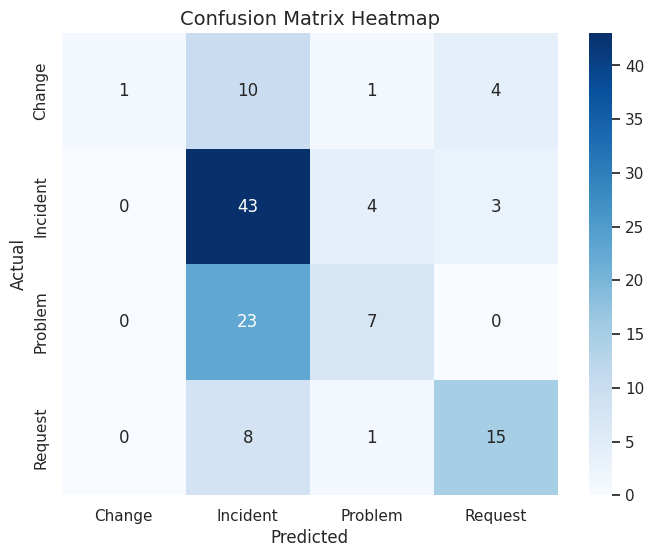

In [ ]:
# Confusion Matrix Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Dataset 1.1(Random Analysis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

<ipython-input-34-e4d4986f9319>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_counts.index, y=priority_counts.values, palette="viridis")


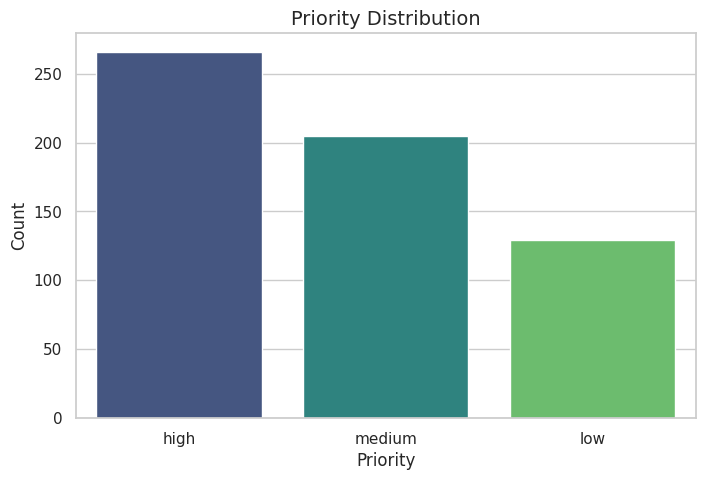

In [ ]:
# 1. Priority Distribution
plt.figure(figsize=(8, 5))
priority_counts = data['priority'].value_counts()
sns.barplot(x=priority_counts.index, y=priority_counts.values, palette="viridis")
plt.title("Priority Distribution", fontsize=14)
plt.xlabel("Priority", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-36-628313cdd070>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")


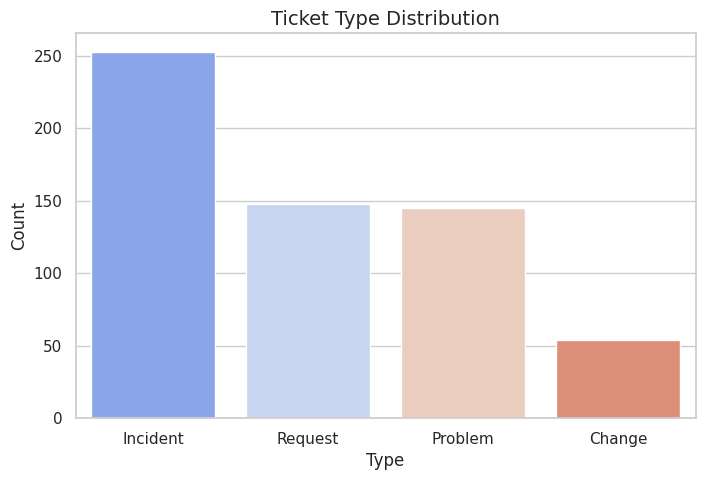

In [ ]:
# 2. Type Analysis
plt.figure(figsize=(8, 5))
type_counts = data['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="coolwarm")
plt.title("Ticket Type Distribution", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-37-c46e3ec5ac29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=queue_counts.index, y=queue_counts.values, palette="crest")


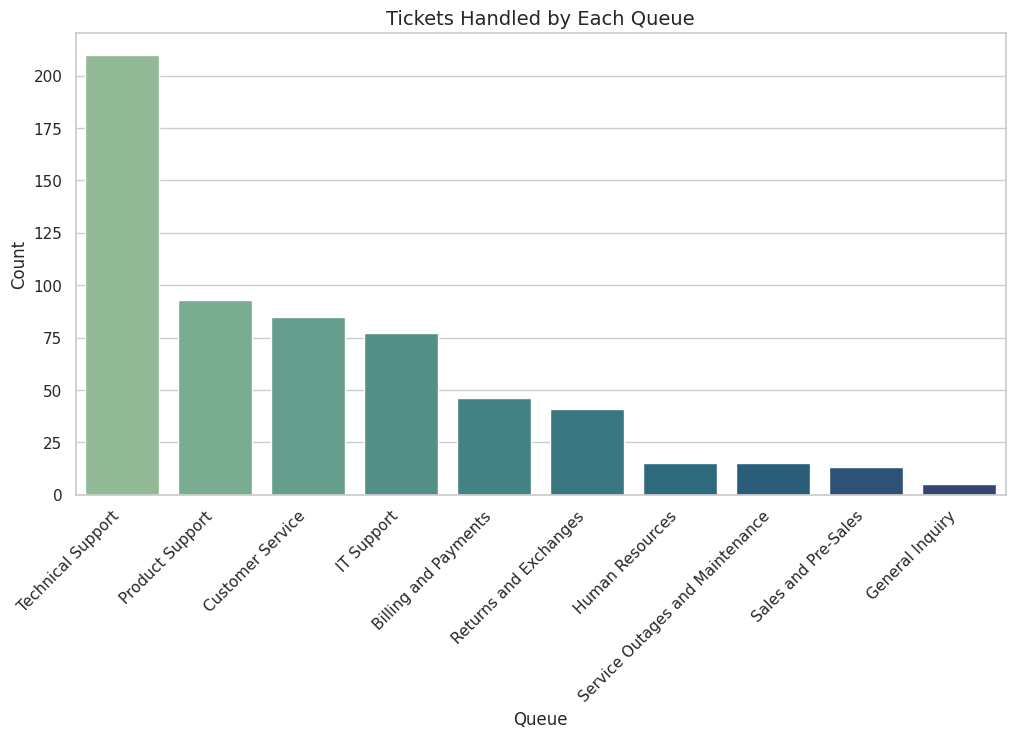

In [ ]:
# 3. Queue Performance
plt.figure(figsize=(12, 6))
queue_counts = data['queue'].value_counts()
sns.barplot(x=queue_counts.index, y=queue_counts.values, palette="crest")
plt.title("Tickets Handled by Each Queue", fontsize=14)
plt.xlabel("Queue", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-38-92d415536ab1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="mako")


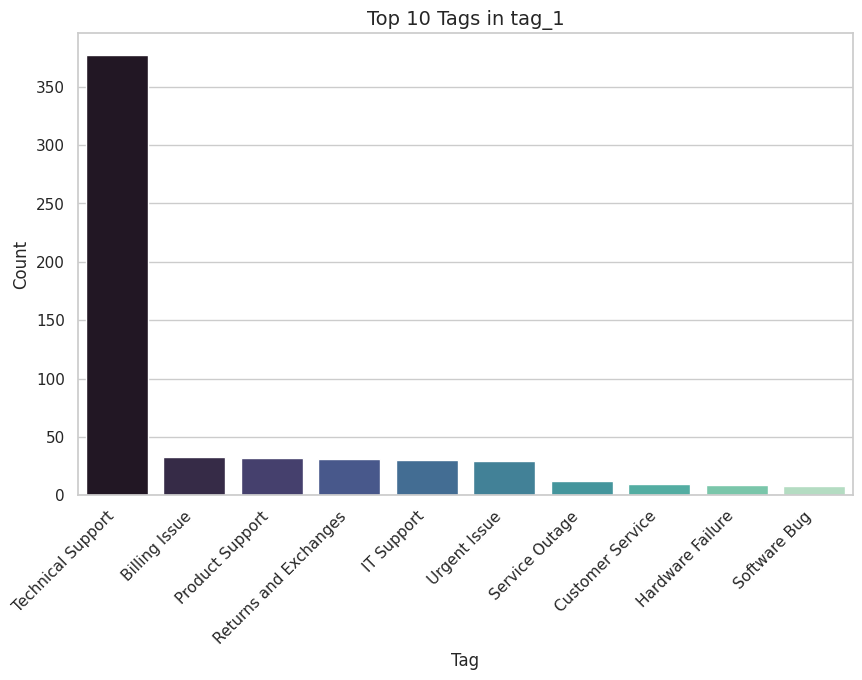

In [ ]:
# 4. Tag Insights (Top 10 tags in tag_1)
plt.figure(figsize=(10, 6))
tag_counts = data['tag_1'].value_counts().head(10)
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="mako")
plt.title("Top 10 Tags in tag_1", fontsize=14)
plt.xlabel("Tag", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-39-f4f97c48f73c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="flare")


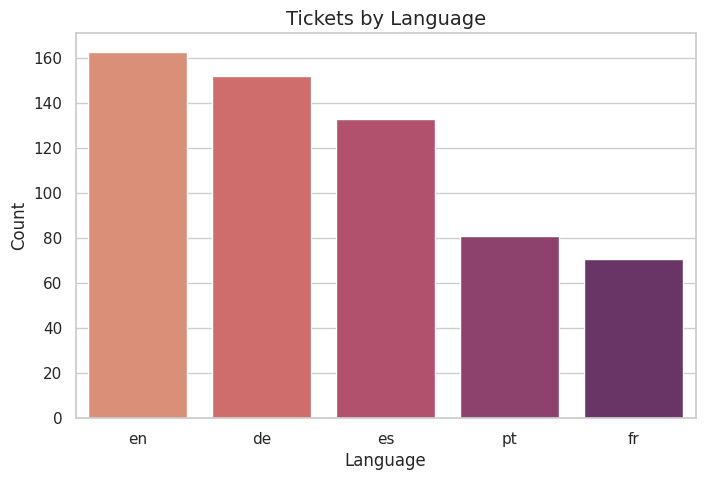

In [ ]:
# 5. Language Trends
plt.figure(figsize=(8, 5))
language_counts = data['language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values, palette="flare")
plt.title("Tickets by Language", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

<ipython-input-40-bceb1e44e85f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=business_counts.index, y=business_counts.values, palette="cubehelix")


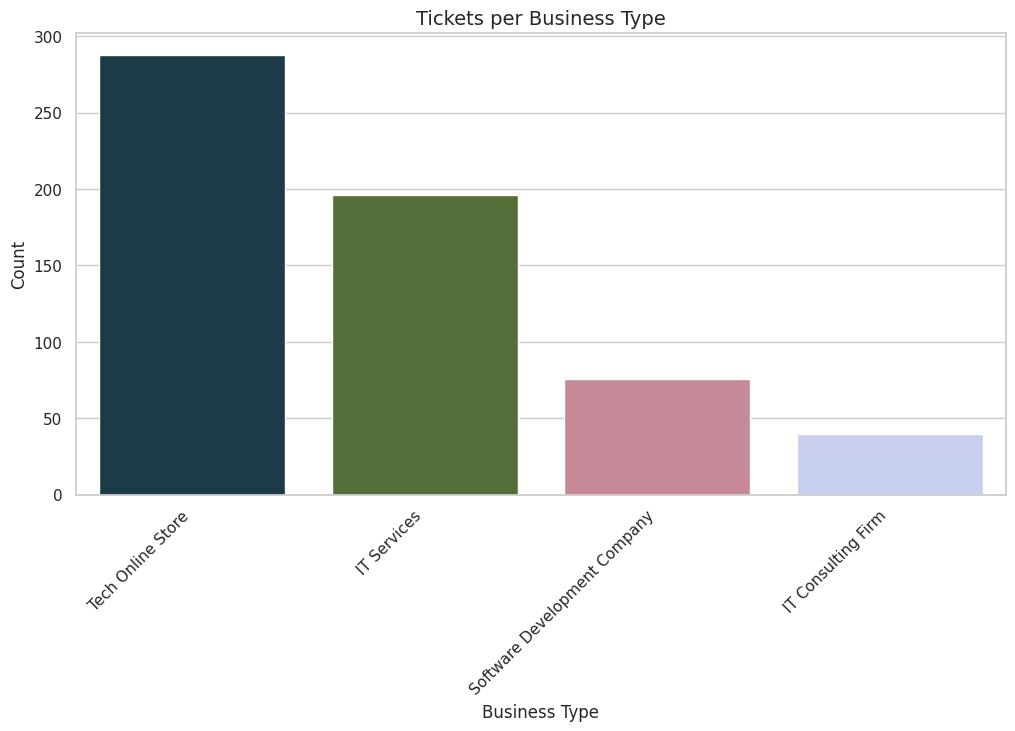

In [ ]:
# 6. Business Analysis
plt.figure(figsize=(12, 6))
business_counts = data['business_type'].value_counts()
sns.barplot(x=business_counts.index, y=business_counts.values, palette="cubehelix")
plt.title("Tickets per Business Type", fontsize=14)
plt.xlabel("Business Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()
